# QCTO - Workplace Module

### Project Title: Stroke Prediction Using Machine Learning: Identifying Risk Factors for Early Detection
#### Done By: Khumbelo Shaun Dowelani

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

### Context
Stroke is the **2nd leading cause of death globally**, responsible for approximately **11% of total deaths**, according to the **World Health Organization (WHO)**. A stroke occurs when blood flow to the brain is disrupted, leading to potential long-term disability or death. Early detection and prevention are **critical** in reducing stroke-related fatalities and improving patient outcomes.  

This dataset provides **medical and demographic information** to predict whether a person is at risk of having a stroke. It includes features such as **age, gender, underlying diseases (e.g., hypertension, diabetes), and lifestyle factors (e.g., smoking status)**. By analyzing these factors, we can build a **predictive model** to help identify high-risk individuals and support early medical intervention.  

### Purpose of the Project  
The goal of this project is to **develop a machine learning model** that predicts the likelihood of a patient experiencing a stroke based on their medical history and lifestyle. This will enable:  

- **Early detection of stroke risk**, allowing for timely medical intervention.  
- **Identification of key risk factors** contributing to stroke occurrences.  
- **Support for healthcare professionals** in decision-making and risk assessment.  

### Significance of the Study  
By leveraging **machine learning for stroke prediction**, this project aims to **reduce preventable deaths, enhance early diagnosis, and optimize healthcare resource allocation**. A well-performing model could assist in **screening patients efficiently**, leading to better stroke prevention strategies and improved patient care.

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')



---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

### Data Source  
The dataset was obtained from **Kaggle**, a popular online repository for open datasets. While the exact data collection method is not specified, it is structured for **stroke prediction research** and contains relevant medical and demographic attributes. 

The dataset contains **5110 rows and 12 columns**, providing relevant information about the patient's health status and demographic data. Below is a detailed description of each attribute:

1. **id**:  
   - A **unique identifier** for each patient in the dataset.  
   
2. **gender**:  
   - The **gender** of the patient. Possible values are:
     - `"Male"`, `"Female"`, or `"Other"`.  
   
3. **age**:  
   - The **age** of the patient in **years**.  

4. **hypertension**:  
   - Indicates whether the patient has **hypertension** (high blood pressure).
     - `0` if the patient **doesn't** have hypertension,  
     - `1` if the patient **has** hypertension.  

5. **heart_disease**:  
   - Indicates whether the patient has a **heart disease**.  
     - `0` if the patient **doesn't** have heart disease,  
     - `1` if the patient **has** heart disease.  

6. **ever_married**:  
   - Indicates whether the patient has **ever been married**. Possible values:
     - `"No"` or `"Yes"`.  

7. **work_type**:  
   - The **type of work** the patient is involved in. Possible values:
     - `"children"`, `"Govt_job"`, `"Never_worked"`, `"Private"`, or `"Self-employed"`.  

8. **Residence_type**:  
   - Indicates whether the patient lives in a **rural** or **urban** area. Possible values:
     - `"Rural"` or `"Urban"`.  

9. **avg_glucose_level**:  
   - The **average glucose level** in the patient's blood, typically measured in **mg/dL**.  

10. **bmi**:  
    - The **body mass index (BMI)** of the patient, a measure of body fat based on height and weight.  

11. **smoking_status**:  
    - Indicates the patient's **smoking status**. Possible values:
      - `"formerly smoked"`, `"never smoked"`, `"smokes"`, or `"Unknown"`.  
    - Note: `"Unknown"` means that the smoking information is unavailable for the patient.  

12. **stroke**:  
    - The **target variable** indicating whether the patient had a stroke.  
      - `1` if the patient **had a stroke**,  
      - `0` if the patient **did not have a stroke**.  

These attributes form the foundation for predicting whether a patient is likely to experience a stroke. The features include **demographic details**, **health conditions**, and **lifestyle factors**, all of which contribute to the risk of stroke occurrence.  

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [3]:
# Load the dataset
df = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')

# Display first few rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

#### Checking for Missing Values
We inspect the dataset for any missing values in each column to determine if data cleaning is necessary.

In [4]:
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


The output shows that only the bmi column has missing values (201 missing entries), while all other columns are complete.

#### Handling Missing Values
This code removes rows where the bmi column has missing values, ensuring the dataset has no missing entries afterward. It then verifies that all missing values are handled.

In [5]:
# Drop rows where 'bmi' column has missing values
df = df.dropna(subset=['bmi'])

# Verify if any missing values remain
print(df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


#### Checking for Duplicate Rows
*This code checks the dataset for any duplicate rows and prints the total number of duplicates found.*

In [6]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")


Number of Duplicate Rows: 0


#### Counting Rows in the Dataset
*This code calculates and prints the total number of rows (observations) present in the dataset.*

In [7]:
row_count = df.shape[0]
print(f"Number of rows: {row_count}")

Number of rows: 4909


In [8]:
# Function to check for errors in each column
def check_data_errors(df):
    print("---- Checking for Errors in Each Column ----\n")

    # Check for duplicate IDs
    if 'id' in df.columns:
        duplicate_ids = df['id'].duplicated().sum()
        print(f"Duplicate IDs: {duplicate_ids}")

    # Check for invalid values in 'gender' column
    if 'gender' in df.columns:
        invalid_genders = df[~df['gender'].isin(['Male', 'Female', 'Other'])]
        print(f"Invalid gender values: {invalid_genders.shape[0]}")

    # Check for negative or unrealistic ages
    if 'age' in df.columns:
        invalid_ages = df[(df['age'] < 0) | (df['age'] > 120)]  
        print(f"Invalid ages: {invalid_ages.shape[0]}")

    # Check for invalid hypertension values (should be 0 or 1)
    if 'hypertension' in df.columns:
        invalid_hypertension = df[~df['hypertension'].isin([0, 1])]
        print(f"Invalid hypertension values: {invalid_hypertension.shape[0]}")

    # Check for invalid heart disease values (should be 0 or 1)
    if 'heart_disease' in df.columns:
        invalid_heart_disease = df[~df['heart_disease'].isin([0, 1])]
        print(f"Invalid heart disease values: {invalid_heart_disease.shape[0]}")

    # Check for invalid marital status
    if 'ever_married' in df.columns:
        invalid_marriage_status = df[~df['ever_married'].isin(['Yes', 'No'])]
        print(f"Invalid marriage status values: {invalid_marriage_status.shape[0]}")

    # Check for invalid work types
    if 'work_type' in df.columns:
        valid_work_types = ['children', 'Govt_job', 'Never_worked', 'Private', 'Self-employed']
        invalid_work_types = df[~df['work_type'].isin(valid_work_types)]
        print(f"Invalid work type values: {invalid_work_types.shape[0]}")

    # Check for invalid residence type
    if 'Residence_type' in df.columns:
        invalid_residence = df[~df['Residence_type'].isin(['Rural', 'Urban'])]
        print(f"Invalid residence type values: {invalid_residence.shape[0]}")

    # Check for negative or extremely high avg_glucose_level values
    if 'avg_glucose_level' in df.columns:
        invalid_glucose = df[df['avg_glucose_level'] <= 0]
        print(f"Invalid avg_glucose_level values: {invalid_glucose.shape[0]}")

    # Check for negative or extreme BMI values
    if 'bmi' in df.columns:
        invalid_bmi = df[(df['bmi'] <= 0) | (df['bmi'] > 100)]  # BMI over 100 is highly unlikely
        print(f"Invalid BMI values: {invalid_bmi.shape[0]}")

    # Check for invalid smoking status
    if 'smoking_status' in df.columns:
        valid_smoking_status = ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
        invalid_smoking = df[~df['smoking_status'].isin(valid_smoking_status)]
        print(f"Invalid smoking status values: {invalid_smoking.shape[0]}")

    # Check for invalid stroke values (should be 0 or 1)
    if 'stroke' in df.columns:
        invalid_stroke = df[~df['stroke'].isin([0, 1])]
        print(f"Invalid stroke values: {invalid_stroke.shape[0]}")

# Run the function to check for errors
check_data_errors(df)

---- Checking for Errors in Each Column ----

Duplicate IDs: 0
Invalid gender values: 0
Invalid ages: 0
Invalid hypertension values: 0
Invalid heart disease values: 0
Invalid marriage status values: 0
Invalid work type values: 0
Invalid residence type values: 0
Invalid avg_glucose_level values: 0
Invalid BMI values: 0
Invalid smoking status values: 0
Invalid stroke values: 0


#### Removing Outliers
This code removes outliers from the dataset. It applies the IQR (Interquartile Range) method for numeric columns and eliminates rare categories for categorical columns, ensuring a cleaner and more reliable dataset for modeling.

In [9]:
# Define a function to remove outliers using IQR (Interquartile Range) for numerical columns
def remove_outliers_numeric(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Define a function to remove rare categories (outliers) for categorical columns
def remove_outliers_categorical(df, column, threshold=0.01):
    value_counts = df[column].value_counts(normalize=True)
    common_categories = value_counts[value_counts >= threshold].index
    return df[df[column].isin(common_categories)]

# Apply outlier removal
numeric_cols = ['age', 'avg_glucose_level', 'bmi']
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status']

# Remove outliers for numeric columns
for col in numeric_cols:
    df = remove_outliers_numeric(df, col)

# Remove rare outliers for categorical columns
for col in categorical_cols:
    df = remove_outliers_categorical(df, col)


#### Counting Rows in the Dataset
*This code calculates and prints the total number of rows (observations) present in the dataset.*

In [10]:
row_count = df.shape[0]
print(f"Number of rows: {row_count}")

Number of rows: 4229


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


#### Summary Statistics
This step generates the summary statistics for the numerical columns of the dataset, providing key insights such as mean, standard deviation, and percentiles. These metrics help understand the distribution and variability of the data.

In [11]:
print("\n---- Summary Statistics ----")
print(df.drop(columns=['id']).describe())


---- Summary Statistics ----
               age  hypertension  heart_disease  avg_glucose_level  \
count  4229.000000   4229.000000    4229.000000        4229.000000   
mean     40.729127      0.069047       0.036652          91.477356   
std      22.450126      0.253564       0.187927          22.669193   
min       0.080000      0.000000       0.000000          55.120000   
25%      23.000000      0.000000       0.000000          75.060000   
50%      42.000000      0.000000       0.000000          88.060000   
75%      58.000000      0.000000       0.000000         104.030000   
max      82.000000      1.000000       1.000000         168.150000   

               bmi       stroke  
count  4229.000000  4229.000000  
mean     27.789927     0.032159  
std       6.671874     0.176443  
min      10.300000     0.000000  
25%      23.000000     0.000000  
50%      27.400000     0.000000  
75%      32.100000     0.000000  
max      46.300000     1.000000  


Age ranges from 0.08 to 82 years, with a mean age of ~40.73, indicating a mix of young and older patients.

Hypertension and heart disease are relatively rare, with mean values of ~0.07 and ~0.04 respectively, suggesting most patients are healthy in these aspects.

Average glucose level has a mean of 91.48 mg/dL, with a max of 168.15, implying some patients may have hyperglycemia.

BMI averages around 27.79, indicating the population tends toward the overweight range (BMI > 25).

Stroke occurrence is low (~3.2%), highlighting a strong class imbalance that should be considered during modeling.

#### Plotting Numeric Distributions

- Plotted histograms for **`age`**, **`avg_glucose_level`**, and **`bmi`** using **Plotly**.
- Visualizes the distribution of each numeric feature with **30 bins**, using a **dark theme** and **light blue color** for clarity.
- Helps detect **skewness**, **outliers**, and **data patterns** in the dataset.


In [12]:
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

for col in numeric_cols:
    fig = px.histogram(df, x=col, nbins=30, title=f"Distribution of {col}",
                       color_discrete_sequence=['lightblue'])
    fig.update_layout(template="plotly_dark", bargap=0.1)
    fig.show()

#### Plotting Binary Feature Counts

- Plotted **bar charts** for binary columns: **`hypertension`**, **`heart_disease`**, and **`stroke`**.
- Custom **colors** were used (`#00bf63` for 0, `#48b4bb` for 1) to distinguish between classes clearly.
- Helps visualize the **imbalance** between positive and negative cases for each condition.
- Dark background and white borders enhance **readability** of the bars.

In [ ]:
stroke_colors = {0: '#00bf63', 1: '#48b4bb'} 

# Focus only on binary columns
binary_cols = ['hypertension', 'heart_disease', 'stroke']

for col in binary_cols:
    count_df = df[col].value_counts().sort_index()  # Ensure correct order (0 first, then 1)

    # Create the figure
    fig = go.Figure()

    # Add bars for each category (0 and 1)
    for val in count_df.index:
        fig.add_trace(go.Bar(
            x=[str(val)],  # Convert to string for proper labeling
            y=[count_df[val]],
            name=f"{col} = {val}",
            marker=dict(color=stroke_colors[val], line=dict(color='white', width=2))
        ))

    # Update layout
    fig.update_layout(
        title=f"Count Plot of {col}",
        xaxis_title=col,
        yaxis_title="Count",
        template="plotly_dark",
        plot_bgcolor='black',
        paper_bgcolor='black',
        font=dict(color="white"),
        showlegend=False
    )

    fig.show()


#### Correlation Matrix Heatmap

- **Numerical columns** were selected to calculate **pairwise correlations**.
- A **heatmap** was created to **visualize** relationships:
  - Values close to **1** or **-1** indicate strong positive/negative correlations.
  - Values near **0** suggest **weak or no correlation**.
- **Green color scale** and dark theme were used for better **contrast** and **readability**.
- Helpful to identify **important feature interactions** for modeling.

In [16]:
df_numeric = df.drop(columns=['id']).select_dtypes(include=['number'])  # Keep only numeric columns

# Compute the correlation matrix
corr_matrix = df_numeric.corr().round(2)

# Create heatmap
fig = ff.create_annotated_heatmap(z=corr_matrix.values, 
                                  x=list(corr_matrix.columns), 
                                  y=list(corr_matrix.index),
                                  colorscale="greens", 
                                  showscale=True)

# Update layout
fig.update_layout(
    title="Correlation Matrix",
    template="plotly_dark",
    plot_bgcolor="black",
    paper_bgcolor="black",
    font=dict(color="white")
)

fig.show()

#### Violin Plots for Numeric Features (Colored by Stroke)

- **Violin plots** were generated for **`age`**, **`avg_glucose_level`**, and **`bmi`**.
- Data is **split** and **colored** based on **stroke occurrence**:
  - **White** represents patients **without a stroke**.
  - **Red** represents patients **with a stroke**.
- **Box plots** and **individual points** were added for more detailed insights.
- This helps visualize **distribution patterns** and **outliers** between stroke groups.

In [15]:
for col in numeric_cols:
    fig = px.violin(df, y=col, color="stroke", box=True, points="all",
                    title=f"Violin Plot of {col} (Colored by Stroke)",
                    color_discrete_sequence=["#ffffff", "#d62728"])  # White = No Stroke, Red = Stroke

    fig.update_layout(
        template="plotly_dark",
        plot_bgcolor="black",
        paper_bgcolor="black",
        font=dict(color="white")
    )
    
    fig.show()

---
<a href=#seven></a>
## **Data Preprocessing**
<a href=#cont>Back to Table of Contents</a>

---

#### Handling Imbalanced Data with SMOTE

- **Categorical variables** were **label encoded** to numeric values.
- **Features** (`X`) and **target** (`y = stroke`) were separated.
- **SMOTE (Synthetic Minority Oversampling Technique)** was applied to **balance** the dataset.
- After SMOTE:
  - The classes for **stroke = 0** and **stroke = 1** became **equal**.
  - **Balanced data** ensures that models won’t be biased towards non-stroke cases.

In [40]:
# Copy the dataframe to avoid modifying the original
df_encoded = df.copy()

# Encode categorical variables
label_encoders = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df_encoded[col])

# Separate features and target variable
X = df_encoded.drop(columns=['id','stroke'])  # Features
y = df_encoded['stroke']  # Target variable

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['stroke'] = y_resampled  # Add target variable back

# Check class distribution after SMOTE
print(df_resampled['stroke'].value_counts())


stroke
1    4093
0    4093
Name: count, dtype: int64


#### Data Splitting and Scaling

- **Numerical features** (`age`, `avg_glucose_level`, `bmi`) were **standardized** using **StandardScaler**.
- **Initial split**:  
  - 80% **Train/Validation**  
  - 20% **Test**
- **Second split** (from training data):  
  - 75% **Train**  
  - 25% **Validation**
- **Stratified splits** were used to **maintain class balance** (equal stroke/no-stroke).

In [41]:
# Separate features and target
df = df_resampled.copy()
X = df.drop('stroke', axis=1)
y = df['stroke']

# Scale numerical columns 
num_cols = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# First split into Train/Test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Further split Train into Train/Validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full)

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


#### Model Training and Validation

- **Models tuned** with **GridSearchCV (5-fold cross-validation)**:
  - **Logistic Regression** (tested `C`, `solver`)
  - **Decision Tree** (tested `max_depth`, `min_samples_split`)
  - **Random Forest** (tested `n_estimators`, `max_depth`)
  - **K-Nearest Neighbors (KNN)** (tested `n_neighbors`, `weights`)
- **Best models** selected based on **highest validation accuracy**.
- **Evaluation metrics** reported on **Validation Set**:
  - **Accuracy**, **Precision**, **Recall**, **F1-Score**
  - **Confusion Matrix** and **Classification Report** printed.

In [42]:
# Define models and grids
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    }),

    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10]
    }),

    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    }),

    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    })
}

# Train with GridSearch on Train set, evaluate on Validation set, Save Models
best_models = {}
for model_name, (model, param_grid) in models.items():
    print(f'\n\n===== {model_name} =====')
    grid = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    best_models[model_name] = best_model  # Save best model

    # Validation Evaluation
    y_val_pred = best_model.predict(X_val)

    acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    print(f'📊 Validation Accuracy: {acc:.4f}')
    print(f'🎯 Precision: {prec:.4f}')
    print(f'🔁 Recall: {rec:.4f}')
    print(f'🏆 F1 Score: {f1:.4f}')
    print('📑 Classification Report:\n', classification_report(y_val, y_val_pred))
    print('🧩 Confusion Matrix:\n', confusion_matrix(y_val, y_val_pred))





===== Logistic Regression =====
📊 Validation Accuracy: 0.8228
🎯 Precision: 0.8028
🔁 Recall: 0.8557
🏆 F1 Score: 0.8284
📑 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       819
           1       0.80      0.86      0.83       818

    accuracy                           0.82      1637
   macro avg       0.82      0.82      0.82      1637
weighted avg       0.82      0.82      0.82      1637

🧩 Confusion Matrix:
 [[647 172]
 [118 700]]


===== Decision Tree =====
📊 Validation Accuracy: 0.8626
🎯 Precision: 0.8198
🔁 Recall: 0.9291
🏆 F1 Score: 0.8711
📑 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.85       819
           1       0.82      0.93      0.87       818

    accuracy                           0.86      1637
   macro avg       0.87      0.86      0.86      1637
weighted avg       0.87      0.86      0.86      1637

🧩 Confusion Matr

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

#### Final Evaluation on Test Set

- **Best models** (after GridSearchCV tuning) were evaluated on the **held-out Test Set**.
- **Performance Metrics Calculated**:
  - **Accuracy**
  - **Precision**
  - **Recall**
  - **F1-Score**

- **Bar plots** were generated for each metric, comparing the models visually.

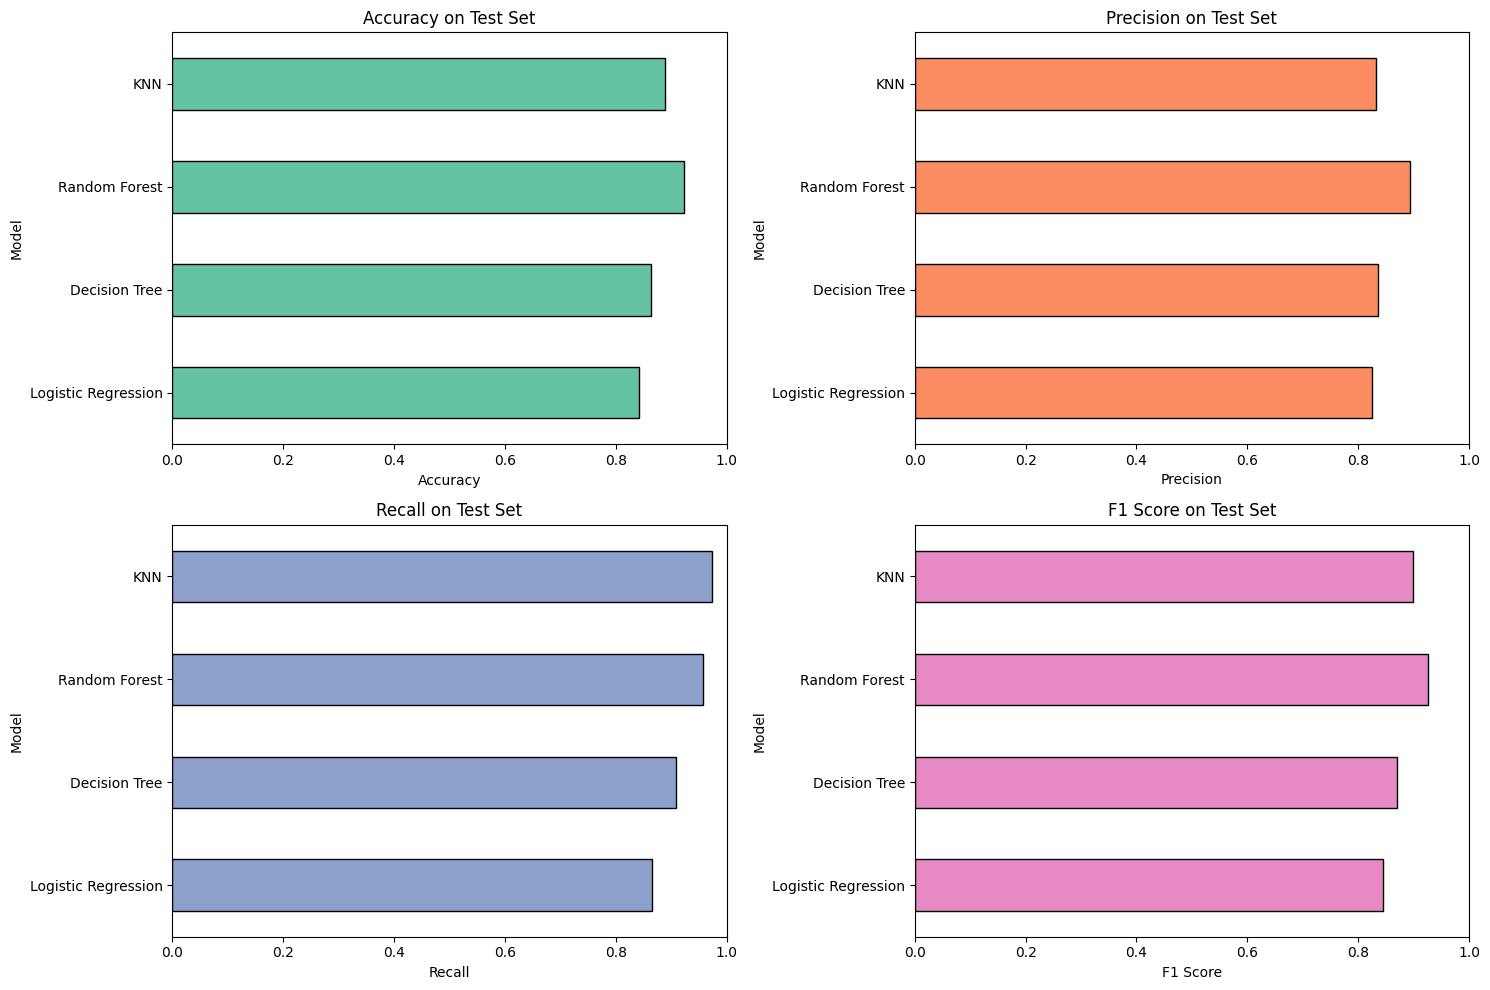

In [43]:
# Final Evaluation on Test Set
test_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

for model_name, model in best_models.items():
    y_test_pred = model.predict(X_test)

    test_metrics['Model'].append(model_name)
    test_metrics['Accuracy'].append(accuracy_score(y_test, y_test_pred))
    test_metrics['Precision'].append(precision_score(y_test, y_test_pred))
    test_metrics['Recall'].append(recall_score(y_test, y_test_pred))
    test_metrics['F1 Score'].append(f1_score(y_test, y_test_pred))

# Plotting bar charts
results_df = pd.DataFrame(test_metrics)
results_df.set_index('Model', inplace=True)

# Plot for each metric
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

for ax, metric, color in zip(axs.flat, metrics, colors):
    results_df[metric].plot(kind='barh', ax=ax, color=color, edgecolor='black')
    ax.set_title(f'{metric} on Test Set')
    ax.set_xlabel(metric)
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()

In [46]:
print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Model                                                       
Logistic Regression  0.841270   0.825378  0.865690  0.845054
Decision Tree        0.864469   0.835017  0.908425  0.870175
Random Forest        0.922466   0.894077  0.958486  0.925162
KNN                  0.889499   0.832985  0.974359  0.898143


- **Random Forest** achieved the **highest performance** with an **Accuracy** of **0.92** and an **F1 Score** of **0.93**, indicating that it effectively predicted stroke cases, especially excelling in **Recall (0.96)**.
- **K-Nearest Neighbors (KNN)** performed surprisingly well this time, with an **Accuracy** of **0.89**, a **high Recall (0.97)**, and a strong **F1 Score (0.90)**, making it a solid model for capturing positive stroke cases.
- **Decision Tree** also showed strong performance with an **Accuracy** of **0.86**, **Precision** of **0.84**, and **Recall** of **0.91**, but it was slightly less robust than Random Forest and KNN.
- **Logistic Regression** maintained **good balance**, with **Accuracy** at **0.84**, **Precision** at **0.83**, and **Recall** at **0.87**, making it a simple yet reliable model despite slightly lower overall metrics compared to the others.

##### **Key Test Set Results**:

| Model                | Accuracy | Precision | Recall | F1 Score |
|----------------------|:--------:|:---------:|:------:|:--------:|
| Random Forest         | 0.922466 | 0.894077  | 0.958486| 0.925162 |
| KNN                   | 0.889499 | 0.832985  | 0.974359| 0.898143 |
| Decision Tree         | 0.864469 | 0.835017  | 0.908425| 0.870175 |
| Logistic Regression   | 0.841270 | 0.825378  | 0.865690| 0.845054 |

---

**Insight**:  
**Random Forest** remains the best performer overall, especially for **high recall** and **balanced precision**.  
Interestingly, **KNN** also showed **excellent recall**, making it a strong backup model for cases where identifying all positive strokes is critical.  
**Logistic Regression** and **Decision Tree** provide simpler alternatives but with slightly lower performance.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---

#### Best Model Configuration Check

In [47]:
best_models['Random Forest'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### **Random Forest Classifier**

**Reason for Selection:**
- Achieved the highest performance across all key metrics on the test set:
  - **Accuracy:** 92.2%
  - **Precision:** 89.4%
  - **Recall:** 95.8%
  - **F1 Score:** 92.5%
- **High Recall** is particularly important in stroke prediction to **minimize false negatives** (missed stroke cases).
- **Random Forests** are robust against overfitting, can handle **imbalanced datasets** effectively (even after SMOTE balancing), and capture **complex feature interactions**.
- Compared to other models, Random Forest provided the best trade-off between recall, precision, and overall reliability.

**Configuration of the Final Model:**
- **n_estimators:** 100
- **max_depth:** None

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: EDA after smote


In [33]:
print("\n---- Summary Statistics ----")
print(df_resampled.describe())


---- Summary Statistics ----
                 id       gender          age  hypertension  heart_disease  \
count   8186.000000  8186.000000  8186.000000   8186.000000    8186.000000   
mean   37138.530418     0.280723    53.084826      0.061080       0.021378   
std    21621.472855     0.449380    21.934187      0.239491       0.144650   
min       77.000000     0.000000     0.080000      0.000000       0.000000   
25%    17352.500000     0.000000    40.000000      0.000000       0.000000   
50%    36853.500000     0.000000    58.000000      0.000000       0.000000   
75%    56020.500000     1.000000    71.281535      0.000000       0.000000   
max    72940.000000     1.000000    82.000000      1.000000       1.000000   

       ever_married    work_type  Residence_type  avg_glucose_level  \
count   8186.000000  8186.000000     8186.000000        8186.000000   
mean       0.673223     1.111654        0.388468          92.202403   
std        0.469064     0.779702        0.487432      

In [34]:
numeric_cols = ['age', 'avg_glucose_level', 'bmi']

for col in numeric_cols:
    fig = px.histogram(df_resampled, x=col, nbins=30, title=f"Distribution of {col}",
                       color_discrete_sequence=['lightblue'])
    fig.update_layout(template="plotly_dark", bargap=0.1)
    fig.show()

In [35]:
stroke_colors = ['#ffffff', '#ff3131', '#00bf63', '#48b4bb', '#555555']

categorical_cols = ['gender', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    count_df = df_resampled[col].value_counts().reset_index()
    count_df.columns = [col, 'count']  # Rename columns for clarity

    fig = px.bar(count_df, 
                 x=col, y='count', 
                 title=f"Count Plot of {col}",
                 color=col, 
                 color_discrete_sequence=stroke_colors) 

    fig.update_layout(
        template="plotly_dark",
        xaxis_title=col, 
        yaxis_title="Count"
    )
    fig.show()


In [36]:
# Define colors (White for 0, Red for 1)
stroke_colors = {0: '#00bf63', 1: '#48b4bb'}  # White (No), Red (Yes)

# Focus only on binary columns
binary_cols = ['hypertension', 'heart_disease', 'stroke']

for col in binary_cols:
    count_df = df_resampled[col].value_counts().sort_index()  # Ensure correct order (0 first, then 1)

    # Create the figure
    fig = go.Figure()

    # Add bars for each category (0 and 1)
    for val in count_df.index:
        fig.add_trace(go.Bar(
            x=[str(val)],  # Convert to string for proper labeling
            y=[count_df[val]],
            name=f"{col} = {val}",
            marker=dict(color=stroke_colors[val], line=dict(color='white', width=2))
        ))

    # Update layout
    fig.update_layout(
        title=f"Count Plot of {col}",
        xaxis_title=col,
        yaxis_title="Count",
        template="plotly_dark",
        plot_bgcolor='black',
        paper_bgcolor='black',
        font=dict(color="white"),
        showlegend=False
    )

    fig.show()


In [37]:
# Convert categorical variables to numeric (if necessary)
df_numeric = df_resampled.select_dtypes(include=['number'])  # Keep only numeric columns

# Compute the correlation matrix
corr_matrix = df_numeric.corr().round(2)

# Create heatmap
fig = ff.create_annotated_heatmap(z=corr_matrix.values, 
                                  x=list(corr_matrix.columns), 
                                  y=list(corr_matrix.index),
                                  colorscale="greens", 
                                  showscale=True)

# Update layout
fig.update_layout(
    title="Correlation Matrix",
    template="plotly_dark",
    plot_bgcolor="black",
    paper_bgcolor="black",
    font=dict(color="white")
)

fig.show()

In [38]:
# Manually define color mapping for stroke (0 → White, 1 → Shades of Red)
stroke_color_map = {0: "#ffffff", 1: "#d62728"}  # White for No Stroke, Dark Red for Stroke

scatter_plots = [
    ('age', 'bmi'),
    ('age', 'avg_glucose_level'),
    ('bmi', 'avg_glucose_level')
]

for x_col, y_col in scatter_plots:
    fig = px.scatter(df_resampled, x=x_col, y=y_col, color=df_resampled["stroke"].map(stroke_color_map),
                     title=f"{x_col} vs {y_col} (Colored by Stroke Variations)",
                     opacity=0.8)

    fig.update_traces(marker=dict(size=7))  # Adjust marker size for better visibility

    fig.update_layout(
        template="plotly_dark",
        plot_bgcolor="black",
        paper_bgcolor="black",
        font=dict(color="white"),
        coloraxis_showscale=False  # Hide color scale since it's binary
    )
    
    fig.show()

In [39]:
for col in numeric_cols:
    fig = px.violin(df_resampled, y=col, color="stroke", box=True, points="all",
                    title=f"Violin Plot of {col} (Colored by Stroke)",
                    color_discrete_sequence=["#ffffff", "#d62728"])  # White = No Stroke, Red = Stroke

    fig.update_layout(
        template="plotly_dark",
        plot_bgcolor="black",
        paper_bgcolor="black",
        font=dict(color="white")
    )
    
    fig.show()